Importing the Dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [26]:
loan=pd.read_csv(r'D:\loan_approval_prediction\train.csv')

In [27]:
# to show 5 rows
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
# shape of the data
loan.shape

(614, 13)

In [29]:
# info of the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
# to check miss values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
loan.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
loan.replace({"Married":{"No":0,"Yes":1}},inplace=True)
loan.replace({"Education":{"Not Graduate":0,"Graduate":1}},inplace=True)
loan.replace({"Self_Employed":{"No":0,"Yes":1}},inplace=True)
loan.replace({"Property_Area":{"Rural":0,"Urban":1,"Semiurban":2}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20832\1253289764.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan.replace({"Property_Area":{"Rural":0,"Urban":1,"Semiurban":2}},inplace=True)


In [46]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.186356,360.0,1.0,1,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


In [47]:
# fill some values with mean,median
loan=loan.fillna(loan["Gender"].mean())

In [48]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
# conver the dattypes
loan["Gender"]=loan["Gender"].astype(int)

In [50]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.186356,360.0,1.0,1,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


In [51]:
loan["Dependents"] = loan["Dependents"].replace("3+", 3)

In [52]:
loan["Property_Area"].value_counts()

Property_Area
2    233
1    202
0    179
Name: count, dtype: int64

In [55]:
loan["Married"]=loan["Married"].astype(int)
loan["Dependents"]=loan["Dependents"].astype(int)
loan["Education"]=loan["Education"].astype(int)
loan["Self_Employed"]=loan["Self_Employed"].astype(int)
loan["Property_Area"]=loan["Property_Area"].astype(int)
loan["Loan_ID"]=loan["Loan_ID"].astype(int)

ValueError: invalid literal for int() with base 10: 'LP001002'

In [39]:
loan["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [58]:
loan=loan.drop(columns="Loan_ID",axis=1)

In [59]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [60]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,0.186356,360.0,1.0,1,Y
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


In [62]:
loan.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20832\659405351.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [63]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,0.186356,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [64]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.367389,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.095607,0.049800,-0.024640,0.109521,-0.017987
Married,-0.367389,1.000000,0.340684,-0.017671,0.008491,0.050194,0.080496,0.140038,-0.079944,-0.019366,-0.000014,0.084281
Dependents,-0.172914,0.340684,1.000000,-0.055752,0.056798,0.118202,0.030430,0.156181,-0.036015,-0.021901,0.001601,0.010118
Education,0.045364,-0.017671,-0.055752,1.000000,0.010383,0.140760,0.062290,0.173246,0.108854,0.083081,0.066740,0.085884
Self_Employed,0.000525,0.008491,0.056798,0.010383,1.000000,0.127180,-0.016100,0.109168,-0.029190,-0.004588,-0.007124,-0.003700
ApplicantIncome,-0.058809,0.050194,0.118202,0.140760,0.127180,1.000000,-0.116605,0.538355,-0.015659,0.002947,-0.017321,-0.004710
CoapplicantIncome,-0.082912,0.080496,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.190386,-0.050329,-0.049114,-0.019087,-0.059187
LoanAmount,-0.095607,0.140038,0.156181,0.173246,0.109168,0.538355,0.190386,1.000000,0.058528,-0.027552,-0.017889,-0.010663
Loan_Amount_Term,0.049800,-0.079944,-0.036015,0.108854,-0.029190,-0.015659,-0.050329,0.058528,1.000000,0.056294,0.032169,0.007295
Credit_History,-0.024640,-0.019366,-0.021901,0.083081,-0.004588,0.002947,-0.049114,-0.027552,0.056294,1.000000,0.039604,0.465363


<Axes: >

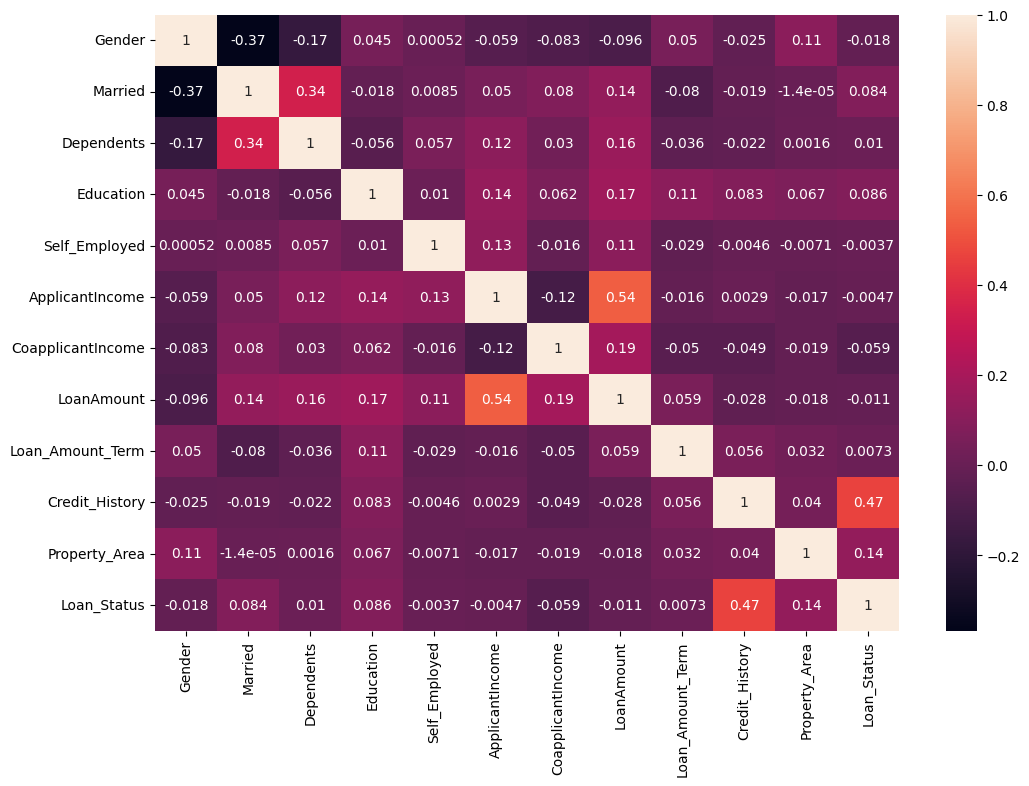

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(),annot=True)

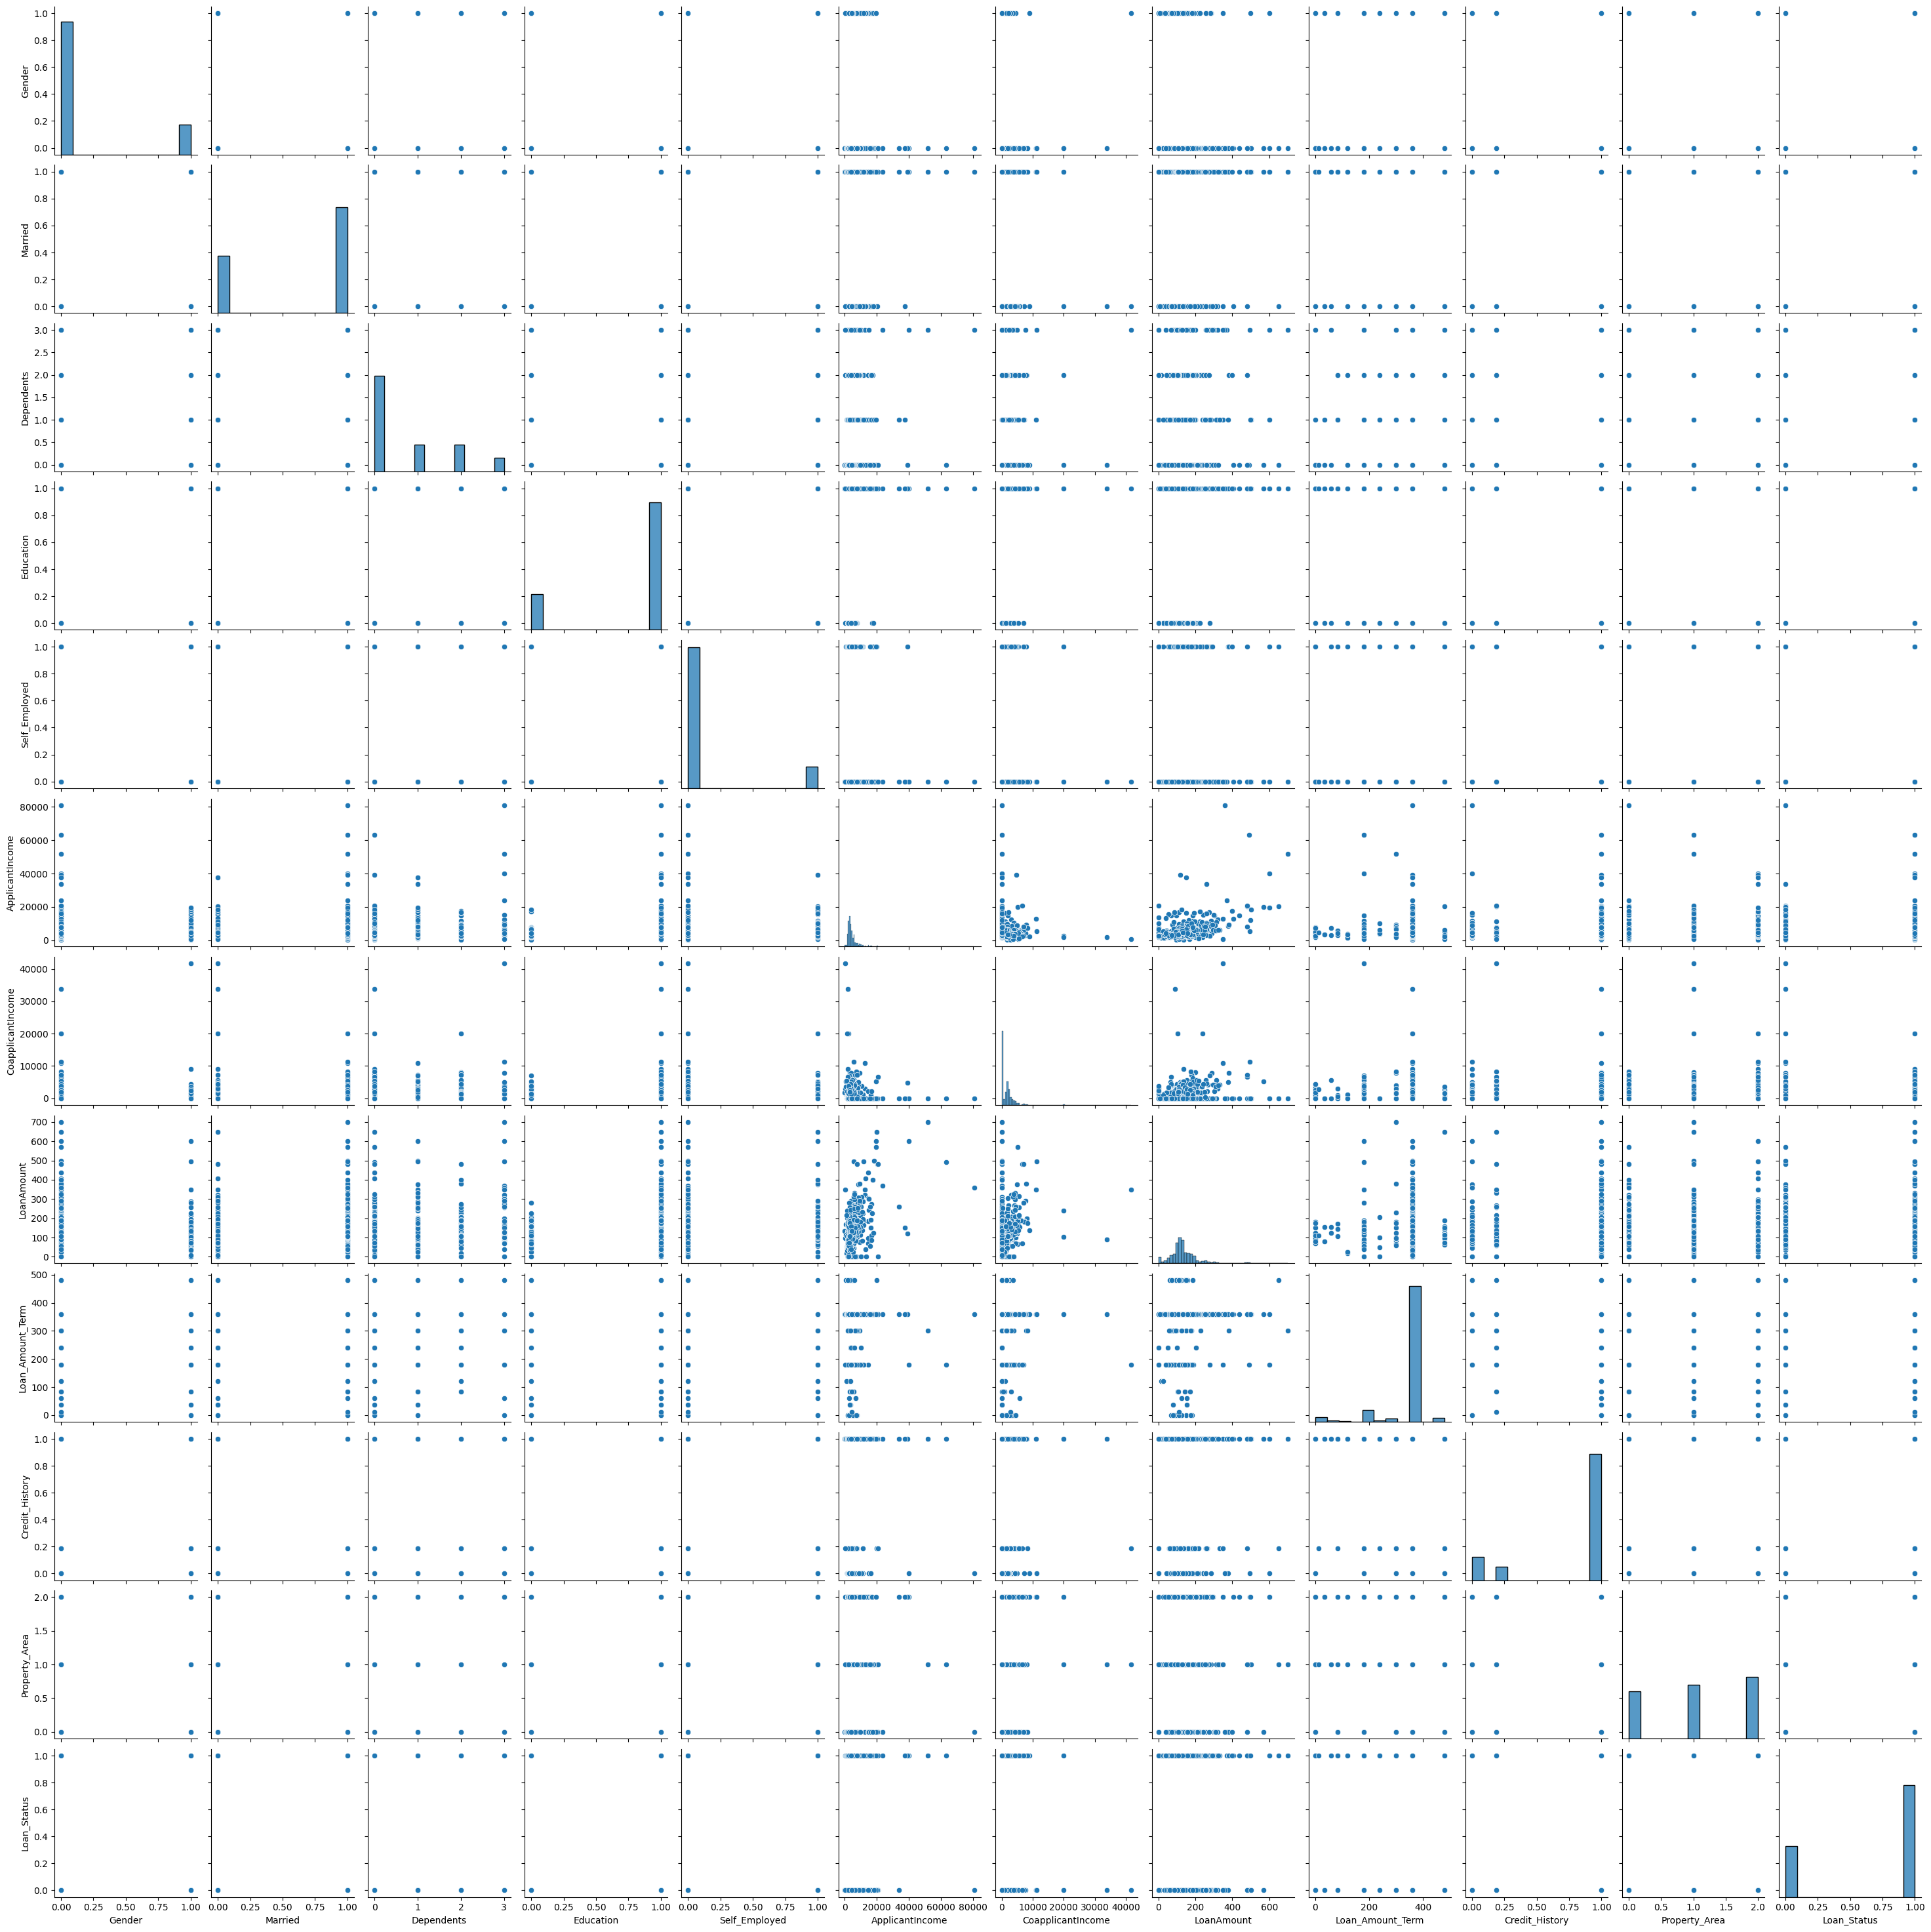

In [68]:
sns.pairplot(loan)

In [70]:
loan.to_csv("cleaned_data.csv")